## 0. Mengimport Modul dan Membaca Data

In [40]:
import pandas as pd
import numpy as np
import time
import torch
import torch_geometric
import scipy
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [14]:
data = torch.load('BankSim 8000')
data.x = data.x.float()

embedding = pd.read_csv('Embedding with ImbalanceSampler.csv').drop(['Unnamed: 0'], axis=1)
label = pd.read_csv('BankSim 8000.csv')['fraud']

## 1. Konversi ke Data Networkx

In [8]:
start_time = time.time()
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
print('Time to transform to networkx graph:', time.time()-start_time)

Time to transform to networkx graph: 488.93345856666565


In [23]:
color = []
for i in data.y.numpy():
    if i == 0:
        color.append('gray')
    if i == 1:
        color.append('red')

## 2. Visualisasi dengan Networkx

Time to draw graph: 706.1246676445007


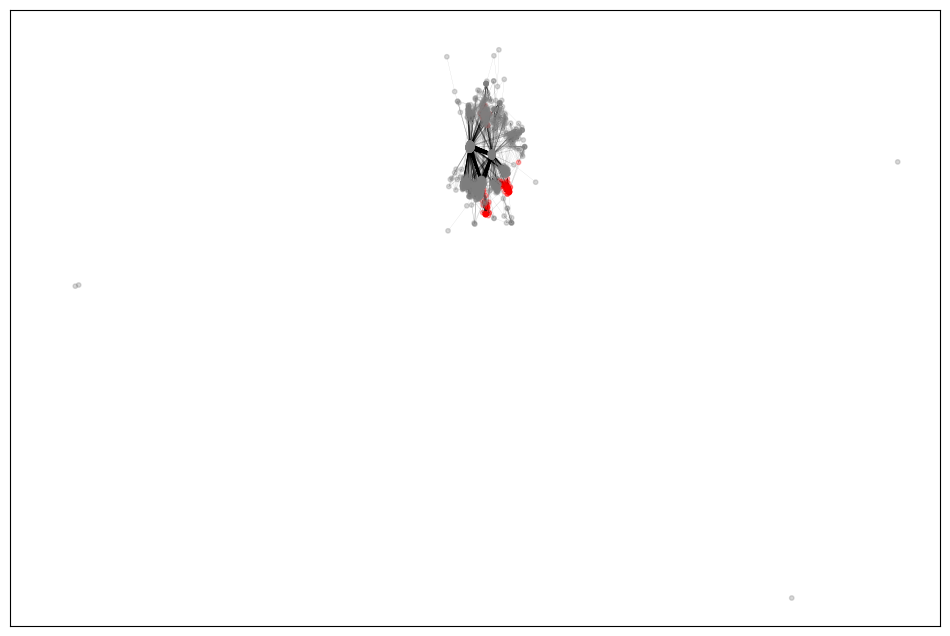

In [38]:
start_time = time.time()
plt.figure(figsize=(12,8))
nx.draw_networkx(G, with_labels=False, node_size=10, alpha=0.3, width=0.1, node_color=color,
                pos = nx.spring_layout(G))
print('Time to draw graph:', time.time()-start_time)

## 3. Visualisasi hasil Embedding

In [ ]:
pca = PCA(n_components=2)
X = pca.fit_transform(embedding, label)

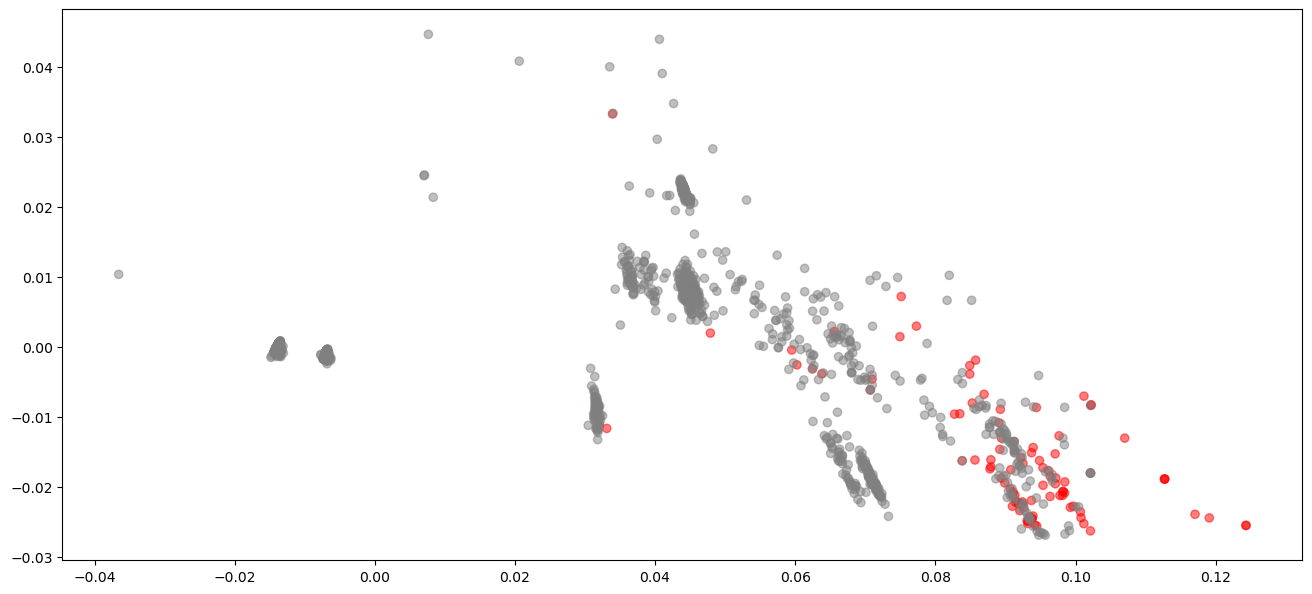

In [33]:
from matplotlib.colors import ListedColormap
newcmap = ListedColormap(['gray','red'])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
ax.scatter(X[:,0],X[:,1],c=label.values,cmap=newcmap, alpha=0.5)
ax.axis('scaled')
plt.show()